***Task 1***

In [ ]:
import nltk
nltk.download('book')
from nltk.book import *
from collections import Counter
import string

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\mehed/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     C:\Users\mehed/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package chat80 to
[nltk_data]    |     C:\Users\mehed/nltk_data...
[nltk_data]    |   Package chat80 is already up-to-date!
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\mehed/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package conll2000 to
[nltk_data]    |     C:\Users\mehed/nltk_data...
[nltk_data]    |   Package conll2000 is already up-to-date!
[nltk_data]    | Downloading package conll2002 to
[nltk_data]    |     C:\Users\mehed/nltk_data...
[nltk_data]    |   Package conll2002 is already up-to-date!
[nltk_data]    |

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


a. What is the vocabulary size for Moby Dick? That is, how many unique words are in Moby Dick?



In [2]:
unique_words = set(text1)
vocabulary_size = len(unique_words)
print(f"Vocabulary size: {vocabulary_size}")

Vocabulary size: 19317


b. How many total words are there in Moby Dick?

In [3]:
total_words = len(text1)
print(f"Total words: {total_words}")

Total words: 260819


c. Count the number of times a word is present in the novella. Create a python dictionary where the key will be a word and the value will be the number of times that word appeared in Moby Dick. We will consider punctuation marks as words here.



In [ ]:
word_counts = {word: text1.count(word) for word in set(text1)}
print(f"Sample word counts: {list(word_counts.items())[:5]}")

d. List top 10 most frequent words based on what you found in C.

In [5]:
top_10_frequent = Counter(word_counts).most_common(10)
print("Top 10 most frequent words (including punctuation):")
for word, count in top_10_frequent:
    print(f"{word}: {count}")

Top 10 most frequent words (including punctuation):
,: 18713
the: 13721
.: 6862
of: 6536
and: 6024
a: 4569
to: 4542
;: 4072
in: 3916
that: 2982


e. List top 10 most frequent words that are not punctuation marks. 



In [6]:
words_without_punctuation = [word for word in text1 if word not in string.punctuation]
word_counts_no_punct = Counter(words_without_punctuation)
top_10_no_punct = word_counts_no_punct.most_common(10)

print("\nTop 10 most frequent words (excluding punctuation):")
for word, count in top_10_no_punct:
    print(f"{word}: {count}")


Top 10 most frequent words (excluding punctuation):
the: 13721
of: 6536
and: 6024
a: 4569
to: 4542
in: 3916
that: 2982
his: 2459
it: 2209
I: 2124


***Task 2***

In [7]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
import string

nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\mehed/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mehed/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

a. Load the csv file using pandas. How many reviews do we have here? Which row has the longest review in terms of words? How about in terms of sentences? 

In [8]:
data = pd.read_csv('imdb_440.csv')

total_reviews = len(data)

longest_review_words = data['review'].apply(lambda x: len(word_tokenize(str(x)))).idxmax()

longest_review_sentences = data['review'].apply(lambda x: len(sent_tokenize(str(x)))).idxmax()

print(f"Total reviews: {total_reviews}")
print(f"Longest review in terms of words: {longest_review_words}th review")
print(f"Longest review in terms of sentences: {longest_review_sentences}th review")


Total reviews: 50000
Longest review in terms of words: 40521th review
Longest review in terms of sentences: 39182th review


b. Cleaning step 1: Now, from each review, remove stopwords and punctuations


In [9]:
def clean_review(review):
    tokens = word_tokenize(str(review).lower())
    stop_words = set(stopwords.words('english'))
    cleaned_tokens = [word for word in tokens if word not in stop_words and word not in string.punctuation]
    return ' '.join(cleaned_tokens)

data['cleaned_review'] = data['review'].apply(clean_review)

print("Cleaned reviews:")
print(data['cleaned_review'].head())

Cleaned reviews:
0    one reviewers mentioned watching 1 oz episode ...
1    wonderful little production br br filming tech...
2    thought wonderful way spend time hot summer we...
3    basically 's family little boy jake thinks 's ...
4    petter mattei 's `` love time money '' visuall...
Name: cleaned_review, dtype: object


c. Cleaning step 2: Convert the reviews to lowercase and save these clean reviews (only the reviews, not their classes from the csv file) in a text file where each line will be a single review that is, line 1 will contain the entire first review, line 2 will contain the entire second review and so on. Check whether you have saved all the reviews, or did you miss out on anything.

In [10]:
with open('cleaned_reviews.txt', 'w', encoding='utf-8') as file:
    for review in data['cleaned_review']:
        file.write(review.lower() + '\n')

print("Cleaned reviews saved to 'cleaned_reviews.txt'.")


Cleaned reviews saved to 'cleaned_reviews.txt'.


***Task 3***

a. Now, use scikit-learn’s TF-IDF vectorizer to perform the same task in 3a.

In [11]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

with open('cleaned_reviews.txt', 'r', encoding='utf-8') as file:
    cleaned_reviews = file.readlines()

data = pd.DataFrame(cleaned_reviews, columns=['review'])

total_reviews = len(data)

data['word_count'] = data['review'].apply(lambda x: len(str(x).split()))
longest_review_words_index = data['word_count'].idxmax()
longest_review_words = data.iloc[longest_review_words_index]

data['sentence_count'] = data['review'].apply(lambda x: len(str(x).split('.')))
longest_review_sentences_index = data['sentence_count'].idxmax()
longest_review_sentences = data.iloc[longest_review_sentences_index]

tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(data['review'])

feature_names = tfidf_vectorizer.get_feature_names_out()

tfidf_sample_df = pd.DataFrame(tfidf_matrix[:5].toarray(), columns=feature_names)

print(f"Total reviews: {total_reviews}")
print(f"Longest review in terms of words: {longest_review_words_index}th review")
print(f"Longest review in terms of sentences: {longest_review_sentences_index}th review")
print(f"TF-IDF Matrix Shape: {tfidf_matrix.shape}")

print("Sample TF-IDF Features (First 5 rows):")
print(tfidf_sample_df)


Total reviews: 50000
Longest review in terms of words: 31481th review
Longest review in terms of sentences: 18085th review
TF-IDF Matrix Shape: (50000, 101568)
Sample TF-IDF Features (First 5 rows):
    00  000  00000000000  0000000000001  00000001  00001  00015  000dm  000s  \
0  0.0  0.0          0.0            0.0       0.0    0.0    0.0    0.0   0.0   
1  0.0  0.0          0.0            0.0       0.0    0.0    0.0    0.0   0.0   
2  0.0  0.0          0.0            0.0       0.0    0.0    0.0    0.0   0.0   
3  0.0  0.0          0.0            0.0       0.0    0.0    0.0    0.0   0.0   
4  0.0  0.0          0.0            0.0       0.0    0.0    0.0    0.0   0.0   

   001  ...  ünel  ünfaithful  üvegtigris  üzümcü   ýs  þorleifsson  þór  \
0  0.0  ...   0.0         0.0         0.0     0.0  0.0          0.0  0.0   
1  0.0  ...   0.0         0.0         0.0     0.0  0.0          0.0  0.0   
2  0.0  ...   0.0         0.0         0.0     0.0  0.0          0.0  0.0   
3  0.0  ...   0.

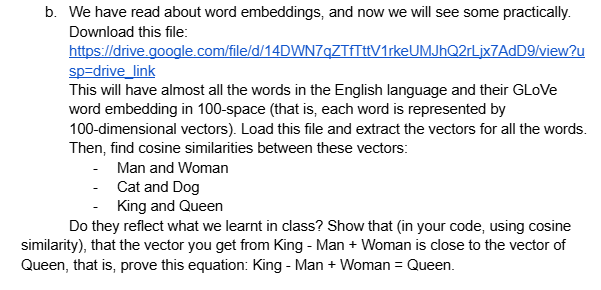

In [12]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

file_path = 'glove.6B.100d.txt'
def load_glove_embeddings(file_path):
    embeddings = {}
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.asarray(values[1:], dtype='float32')
            embeddings[word] = vector
    return embeddings

def cosine_sim(vec1, vec2):
    return cosine_similarity([vec1], [vec2])[0][0]

glove_file_path = 'glove.6B.100d.txt'
embeddings = load_glove_embeddings(glove_file_path)

words = ['man', 'woman', 'cat', 'dog', 'king', 'queen']
vectors = {word: embeddings[word] for word in words}

similarities = {
    'man_woman': cosine_sim(vectors['man'], vectors['woman']),
    'cat_dog': cosine_sim(vectors['cat'], vectors['dog']),
    'king_queen': cosine_sim(vectors['king'], vectors['queen'])
}

king_man_woman = vectors['king'] - vectors['man'] + vectors['woman']
queen_vector = vectors['queen']
equation_similarity = cosine_sim(king_man_woman, queen_vector)

print("Cosine Similarities:")
for pair, similarity in similarities.items():
    print(f"{pair}: {similarity}")

print(f"\nSimilarity between King - Man + Woman and Queen: {equation_similarity}")

Cosine Similarities:
man_woman: 0.8323494791984558
cat_dog: 0.8798074722290039
king_queen: 0.7507690787315369

Similarity between King - Man + Woman and Queen: 0.7834413647651672
